In [1]:
%load_ext rpy2.ipython

In [2]:
# %%R
# install.packages('MuMIn', repos='http://cran.us.r-project.org')

In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import gridspec
import seaborn as sns
import pingouin as pg
import copy
import re
import pickle
import os

In [4]:
import matplotlib
matplotlib.__version__

/home/srj34/deeplabcut-env/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


'3.0.3'

/home/srj34/deeplabcut-env/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [5]:
import shap
import tensorflow
print(shap.__version__, "\n",tensorflow.__version__)

0.40.0 
 1.13.1


In [6]:
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
randomstate = 1234
# For reproducibility
np.random.seed(randomstate)

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [11]:
import matplotlib.pyplot as plt
font = {'family': 'sans-serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

In [13]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [14]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 1000)

In [15]:
def save_obj(obj, name, fname ):
    with open(fname+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(fname + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [16]:
label_fontsize = 16 
title_fontsize = 18

In [17]:
sns.set(style="ticks")

In [18]:
basefilelist = [#"11072018_SponSleep_LFP"   #-- 1(No calib), 
                 "27072018_SponSleep_LFP",  #-- 2
                 "14092018_SponSleep_LFP",  #-- 3
                 "17092018_SponSleep_LFP",  #-- 4
                #"19092018_SponSleep_LFP",  #-- 5(Noisy calib)
                 "30102018_SponSleep_LFP",  #-- 6
                 "01112018_SponSleep_LFP",  #-- 7
                 "03112018_SponSleep_LFP",  #-- 8
                 "13112018_SponSleep_LFP",  #-- 9 
                #"21112018_SponSleep_LFP",  #-- 10(Very little sleep trials)
                #"22112018_SponSleep_LFP",  #-- 11(Very Noisy calib)
                 "28112018_SponSleep_LFP",  #-- 12(Very little sleep trials)
                #"29112018_SponSleep_LFP",  #-- 13(Inactive after 4 hours)
                 "11122018_SponSleep_LFP",  #-- 14
                 "13122018_SponSleep_LFP",  #-- 15(Very awake fly)
                 "18122018_SponSleep_LFP",  #-- 16
                 "10012019_SponSleep_LFP",  #-- 17
                 "17012019_SponSleep_LFP",  #-- 18
                 "22012019_SponSleep_LFP",  #-- 19
                #"07022019_SponSleep_LFP",  #-- 20(No sleep data)
                 "20022019_SponSleep_LFP",  #-- 21
                #"06032019_SponSleep_LFP",  #-- 22(Noisy calib)
                 "13032019_SponSleep_LFP",  #-- 23
                ]

In [19]:
n_flies = len(basefilelist)
print("Total files considered: " + str(n_flies))

Total files considered: 16


In [20]:
reference = 'neutral' #'neutral','diff'

In [21]:
basefolder = "/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/"

In [22]:
inputfolderpath = basefolder + "drosSleepStages_SciAdvances2023/data/lfp_data/spectrum/forestclassifier/"

In [23]:
def collatecsv():
    
    allfeatures_df = []
    
    for basefileidx in range(len(basefilelist)):
        basefilename = basefilelist[basefileidx]
        print('Processing: ', basefilename)
    
        inputfilepath = inputfolderpath + "Spectrum_CSV_" + reference + "_ref_" + basefilename + ".csv"
        features_spectrum_df = pd.read_csv(inputfilepath)
        
        if basefileidx == 0:
            allfeatures_df = features_spectrum_df 
        else:
            allfeatures_df = allfeatures_df.append(features_spectrum_df)
            
    return allfeatures_df

In [24]:
# allfeatures_df = collatecsv()

In [25]:
# allfeatures_df['state'].value_counts()

In [26]:
# csvoutputpath = inputfolderpath
# csvoutputpath +=  "merged_Spectrum_CSV_" + reference + "_ref" + ".csv"
# csvoutputpath

In [27]:
# allfeatures_df.to_csv(csvoutputpath, encoding='utf-8', index=False)

In [28]:
# allfeatures_df

In [29]:
datasetpath = inputfolderpath
datasetpath +=  "merged_Spectrum_CSV_" + reference + "_ref" + ".csv"
datasetpath

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/lfp_data/spectrum/forestclassifier/merged_Spectrum_CSV_neutral_ref.csv'

In [30]:
# We have training data available as csv file
features_df = pd.read_csv(datasetpath)

In [31]:
features_df

,freq4.88_chan01,freq4.88_chan02,freq4.88_chan03,freq4.88_chan04,freq4.88_chan05,freq4.88_chan06,freq4.88_chan07,freq4.88_chan08,freq4.88_chan09,freq4.88_chan10,...,freq40.04_chan11,freq40.04_chan12,freq40.04_chan13,freq40.04_chan14,freq40.04_chan15,start_time,end_time,state,depth,fly
0,16.907746,18.031327,16.695582,16.928798,15.740280,13.882950,12.989385,13.230149,12.057229,12.278152,...,3.228627,-0.163291,3.477128,5.864448,10.546624,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min01,27072018_SponSleep_LFP
1,18.219623,17.288638,14.989972,14.163098,13.005335,11.676813,10.656620,9.535862,8.410238,8.727287,...,2.609511,-2.032236,0.119382,-0.759690,1.761731,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min02,27072018_SponSleep_LFP
2,19.019229,18.067138,16.807576,16.786777,16.122223,15.413145,15.789958,13.978603,13.332066,12.588074,...,8.372123,3.774294,9.054524,11.292854,15.218561,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min03,27072018_SponSleep_LFP
3,17.412197,15.146518,13.969461,13.137674,12.669202,12.023402,10.728541,10.636679,9.142379,8.341223,...,1.538661,-2.308884,-1.166614,0.845271,0.130059,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min04,27072018_SponSleep_LFP
4,16.852660,15.657018,15.303795,15.510230,15.219867,14.411664,14.829397,14.049612,12.047110,12.566136,...,9.052597,2.516190,11.085336,13.465725,17.404638,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min05,27072018_SponSleep_LFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,5.384316,4.520180,4.416598,4.200604,2.423884,1.408764,2.341573,1.330297,2.545163,-0.069842,...,-4.562900,-4.254393,-5.182509,-3.241753,-4.578022,13-Mar-2019 17:33:19,13-Mar-2019 17:42:41,latesleep,epoch04_depth01_min01,13032019_SponSleep_LFP
9217,7.748099,7.314080,7.430064,6.268098,4.917377,3.943951,3.213651,3.149770,3.304940,1.394683,...,-5.201816,-4.321264,-4.879158,-3.198854,-2.762537,13-Mar-2019 17:52:00,13-Mar-2019 17:59:11,latesleep,epoch05_depth01_min01,13032019_SponSleep_LFP
9218,6.214232,6.497935,6.618647,5.300278,3.599756,3.440659,3.094485,1.248967,3.086514,0.598200,...,-5.215729,-4.615625,-5.367402,-4.736421,-4.348551,13-Mar-2019 18:10:50,13-Mar-2019 18:17:43,latesleep,epoch06_depth01_min01,13032019_SponSleep_LFP
9219,6.656751,6.654786,6.809023,5.737107,5.398233,4.580573,3.932749,4.273100,3.936683,1.769453,...,-5.705252,-5.420793,-4.880630,-3.688537,-3.957618,13-Mar-2019 18:30:59,13-Mar-2019 18:47:09,latesleep,epoch07_depth01_min01,13032019_SponSleep_LFP


In [32]:
features_df = features_df[features_df.state != 'sleep']

In [33]:
features_df['state'] = features_df['state'].str.replace('intrans', 'presleep')
features_df['state'] = features_df['state'].str.replace('earlymidsleep', 'earlysleep')
features_df['state'] = features_df['state'].str.replace('latemidsleep', 'latesleep')

In [34]:
colnames = list(features_df.columns)

In [35]:
# roi_list = filter(lambda s: re.match("^freq[7-9]|10.*_chan0[2-3]", s), colnames)
# roi_list = list(roi_list)

In [36]:
# filter_columns = (features_df.columns.isin(roi_list)) & (~features_df.columns.isin(['fly', 'state']))
filter_columns = (~features_df.columns.isin(['fly', 'state']))

In [37]:
plotspectrum_df = features_df.copy()
# plotspectrum_df['spectrum'] = feat_tr_mean
plotspectrum_df

,freq4.88_chan01,freq4.88_chan02,freq4.88_chan03,freq4.88_chan04,freq4.88_chan05,freq4.88_chan06,freq4.88_chan07,freq4.88_chan08,freq4.88_chan09,freq4.88_chan10,...,freq40.04_chan11,freq40.04_chan12,freq40.04_chan13,freq40.04_chan14,freq40.04_chan15,start_time,end_time,state,depth,fly
0,16.907746,18.031327,16.695582,16.928798,15.740280,13.882950,12.989385,13.230149,12.057229,12.278152,...,3.228627,-0.163291,3.477128,5.864448,10.546624,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min01,27072018_SponSleep_LFP
1,18.219623,17.288638,14.989972,14.163098,13.005335,11.676813,10.656620,9.535862,8.410238,8.727287,...,2.609511,-2.032236,0.119382,-0.759690,1.761731,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min02,27072018_SponSleep_LFP
2,19.019229,18.067138,16.807576,16.786777,16.122223,15.413145,15.789958,13.978603,13.332066,12.588074,...,8.372123,3.774294,9.054524,11.292854,15.218561,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min03,27072018_SponSleep_LFP
3,17.412197,15.146518,13.969461,13.137674,12.669202,12.023402,10.728541,10.636679,9.142379,8.341223,...,1.538661,-2.308884,-1.166614,0.845271,0.130059,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min04,27072018_SponSleep_LFP
4,16.852660,15.657018,15.303795,15.510230,15.219867,14.411664,14.829397,14.049612,12.047110,12.566136,...,9.052597,2.516190,11.085336,13.465725,17.404638,27-Jul-2018 15:13:17,27-Jul-2018 15:49:01,awake,epoch01_depth35_min05,27072018_SponSleep_LFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,5.384316,4.520180,4.416598,4.200604,2.423884,1.408764,2.341573,1.330297,2.545163,-0.069842,...,-4.562900,-4.254393,-5.182509,-3.241753,-4.578022,13-Mar-2019 17:33:19,13-Mar-2019 17:42:41,latesleep,epoch04_depth01_min01,13032019_SponSleep_LFP
9217,7.748099,7.314080,7.430064,6.268098,4.917377,3.943951,3.213651,3.149770,3.304940,1.394683,...,-5.201816,-4.321264,-4.879158,-3.198854,-2.762537,13-Mar-2019 17:52:00,13-Mar-2019 17:59:11,latesleep,epoch05_depth01_min01,13032019_SponSleep_LFP
9218,6.214232,6.497935,6.618647,5.300278,3.599756,3.440659,3.094485,1.248967,3.086514,0.598200,...,-5.215729,-4.615625,-5.367402,-4.736421,-4.348551,13-Mar-2019 18:10:50,13-Mar-2019 18:17:43,latesleep,epoch06_depth01_min01,13032019_SponSleep_LFP
9219,6.656751,6.654786,6.809023,5.737107,5.398233,4.580573,3.932749,4.273100,3.936683,1.769453,...,-5.705252,-5.420793,-4.880630,-3.688537,-3.957618,13-Mar-2019 18:30:59,13-Mar-2019 18:47:09,latesleep,epoch07_depth01_min01,13032019_SponSleep_LFP


In [38]:
label_names = features_df.state

In [39]:
features_df['state'].value_counts()

awake         5585
midsleep      1165
earlysleep     262
latesleep      262
presleep       258
Name: state, dtype: int64

In [40]:
centralchannel_roi = 'chan01|chan02|chan03|chan04|chan05|state|fly'
# print(plotspectrum_df.filter(regex=centralchannel_roi).columns)
centralchanspectrum_df = plotspectrum_df.filter(regex=centralchannel_roi)
centralchanspectrum_df

,freq4.88_chan01,freq4.88_chan02,freq4.88_chan03,freq4.88_chan04,freq4.88_chan05,freq5.13_chan01,freq5.13_chan02,freq5.13_chan03,freq5.13_chan04,freq5.13_chan05,...,freq39.79_chan03,freq39.79_chan04,freq39.79_chan05,freq40.04_chan01,freq40.04_chan02,freq40.04_chan03,freq40.04_chan04,freq40.04_chan05,state,fly
0,16.907746,18.031327,16.695582,16.928798,15.740280,14.418936,14.892268,13.705647,14.307397,13.168382,...,8.067263,10.376098,11.733577,4.590917,6.522983,8.193426,9.941866,11.550237,awake,27072018_SponSleep_LFP
1,18.219623,17.288638,14.989972,14.163098,13.005335,16.318695,15.820935,13.860576,12.587748,10.903453,...,7.297482,10.024852,11.118744,4.417294,5.049216,7.128113,9.694694,10.681351,awake,27072018_SponSleep_LFP
2,19.019229,18.067138,16.807576,16.786777,16.122223,17.428666,16.683563,15.939324,16.328731,15.454224,...,9.696620,9.727658,10.061340,7.663368,9.858738,10.458202,10.566242,10.995539,awake,27072018_SponSleep_LFP
3,17.412197,15.146518,13.969461,13.137674,12.669202,15.795498,14.726145,13.299467,11.937471,11.142553,...,7.182831,8.683346,9.422431,4.349557,5.631140,7.522752,8.876952,9.484359,awake,27072018_SponSleep_LFP
4,16.852660,15.657018,15.303795,15.510230,15.219867,15.643733,15.001471,14.536349,14.916057,14.408483,...,9.721335,9.900221,10.589289,5.527381,7.121699,9.779299,9.551639,10.476294,awake,27072018_SponSleep_LFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,5.384316,4.520180,4.416598,4.200604,2.423884,5.587935,4.905113,4.814810,4.156991,2.676369,...,2.984023,3.550651,3.598639,3.243317,2.902656,2.414936,3.181164,3.425186,latesleep,13032019_SponSleep_LFP
9217,7.748099,7.314080,7.430064,6.268098,4.917377,7.587369,7.529913,7.104280,5.955253,5.109571,...,2.267030,2.779379,2.672864,2.788001,1.265119,2.234111,3.127344,2.944576,latesleep,13032019_SponSleep_LFP
9218,6.214232,6.497935,6.618647,5.300278,3.599756,5.959156,6.382956,6.535669,5.006531,3.466793,...,0.684674,0.915575,1.059575,1.682085,1.249419,1.077265,1.146926,1.220695,latesleep,13032019_SponSleep_LFP
9219,6.656751,6.654786,6.809023,5.737107,5.398233,7.099170,7.151271,7.705849,6.453641,6.540645,...,1.809247,2.067299,2.955256,4.281124,2.170934,1.382427,2.253244,2.687807,latesleep,13032019_SponSleep_LFP


In [41]:
csvcentralspectrum_df = centralchanspectrum_df.copy()
csvcentralspectrum_df['spectrum'] = centralchanspectrum_df.loc[:, 
                                    ~centralchanspectrum_df.columns.isin(['state','fly'])].mean(axis = 1)
csvcentralspectrum_df = csvcentralspectrum_df.loc[:, 
                                    csvcentralspectrum_df.columns.isin(['state','fly', 'spectrum'])]
csvcentralspectrum_df['channel'] = 'central'
csvcentralspectrum_df

,state,fly,spectrum,channel
0,awake,27072018_SponSleep_LFP,9.137106,central
1,awake,27072018_SponSleep_LFP,8.768486,central
2,awake,27072018_SponSleep_LFP,11.225076,central
3,awake,27072018_SponSleep_LFP,9.676643,central
4,awake,27072018_SponSleep_LFP,11.223979,central
...,...,...,...,...
9216,latesleep,13032019_SponSleep_LFP,3.200291,central
9217,latesleep,13032019_SponSleep_LFP,3.533753,central
9218,latesleep,13032019_SponSleep_LFP,3.657378,central
9219,latesleep,13032019_SponSleep_LFP,3.960847,central


In [42]:
centralchanspectrum_df2 = centralchanspectrum_df.groupby(['fly', 'state']).mean()
centralchanspectrum_df2 = centralchanspectrum_df2.mean(axis = 1)
centralchanspectrum_df2 = centralchanspectrum_df2.reset_index()
centralchanspectrum_df2 = centralchanspectrum_df2.rename(columns={0: 'spectrum'})
centralchanspectrum_df2['channel'] = 'central'
centralchanspectrum_df2

,fly,state,spectrum,channel
0,01112018_SponSleep_LFP,awake,13.634501,central
1,01112018_SponSleep_LFP,earlysleep,11.595806,central
2,01112018_SponSleep_LFP,latesleep,11.264083,central
3,01112018_SponSleep_LFP,midsleep,11.741379,central
4,01112018_SponSleep_LFP,presleep,13.545092,central
...,...,...,...,...
75,30102018_SponSleep_LFP,awake,10.572323,central
76,30102018_SponSleep_LFP,earlysleep,9.973168,central
77,30102018_SponSleep_LFP,latesleep,10.016120,central
78,30102018_SponSleep_LFP,midsleep,9.978290,central


In [43]:
midchannel_roi = 'chan06|chan07|chan08|chan09|chan10|state|fly'
# print(plotspectrum_df.filter(regex=midchannel_roi).columns)
midchanspectrum_df = plotspectrum_df.filter(regex=midchannel_roi)

In [44]:
csvmiddlespectrum_df = midchanspectrum_df.copy()
csvmiddlespectrum_df['spectrum'] = midchanspectrum_df.loc[:, 
                                    ~midchanspectrum_df.columns.isin(['state','fly'])].mean(axis = 1)
csvmiddlespectrum_df = csvmiddlespectrum_df.loc[:, csvmiddlespectrum_df.columns.isin(['state','fly', 'spectrum'])]
csvmiddlespectrum_df['channel'] = 'middle'
csvmiddlespectrum_df

,state,fly,spectrum,channel
0,awake,27072018_SponSleep_LFP,8.574294,middle
1,awake,27072018_SponSleep_LFP,7.703157,middle
2,awake,27072018_SponSleep_LFP,10.694494,middle
3,awake,27072018_SponSleep_LFP,8.754327,middle
4,awake,27072018_SponSleep_LFP,10.847540,middle
...,...,...,...,...
9216,latesleep,13032019_SponSleep_LFP,0.227328,middle
9217,latesleep,13032019_SponSleep_LFP,0.414142,middle
9218,latesleep,13032019_SponSleep_LFP,0.480689,middle
9219,latesleep,13032019_SponSleep_LFP,0.637157,middle


In [45]:
midchanspectrum_df2 = midchanspectrum_df.groupby(['fly', 'state']).mean()
midchanspectrum_df2 = midchanspectrum_df2.mean(axis = 1)
midchanspectrum_df2 = midchanspectrum_df2.reset_index()
midchanspectrum_df2 = midchanspectrum_df2.rename(columns={0: 'spectrum'})
midchanspectrum_df2['channel'] = 'middle'
midchanspectrum_df2

,fly,state,spectrum,channel
0,01112018_SponSleep_LFP,awake,11.137985,middle
1,01112018_SponSleep_LFP,earlysleep,9.292596,middle
2,01112018_SponSleep_LFP,latesleep,9.094638,middle
3,01112018_SponSleep_LFP,midsleep,9.394643,middle
4,01112018_SponSleep_LFP,presleep,11.044935,middle
...,...,...,...,...
75,30102018_SponSleep_LFP,awake,8.796469,middle
76,30102018_SponSleep_LFP,earlysleep,8.342553,middle
77,30102018_SponSleep_LFP,latesleep,8.344175,middle
78,30102018_SponSleep_LFP,midsleep,8.451158,middle


In [46]:
periphchannel_roi = 'chan11|chan12|chan13|chan14|chan15|state|fly'
# print(plotspectrum_df.filter(regex=periphchannel_roi).columns)
periphchanspectrum_df = plotspectrum_df.filter(regex=periphchannel_roi)

In [47]:
csvperiphspectrum_df = periphchanspectrum_df.copy()
csvperiphspectrum_df['spectrum'] = periphchanspectrum_df.loc[:, 
                                    ~periphchanspectrum_df.columns.isin(['state','fly'])].mean(axis = 1)
csvperiphspectrum_df = csvperiphspectrum_df.loc[:, csvperiphspectrum_df.columns.isin(['state','fly', 'spectrum'])]
csvperiphspectrum_df['channel'] = 'peripheral'
csvperiphspectrum_df

,state,fly,spectrum,channel
0,awake,27072018_SponSleep_LFP,5.833540,peripheral
1,awake,27072018_SponSleep_LFP,2.168690,peripheral
2,awake,27072018_SponSleep_LFP,9.545875,peripheral
3,awake,27072018_SponSleep_LFP,2.473206,peripheral
4,awake,27072018_SponSleep_LFP,9.511253,peripheral
...,...,...,...,...
9216,latesleep,13032019_SponSleep_LFP,-2.161311,peripheral
9217,latesleep,13032019_SponSleep_LFP,-1.960684,peripheral
9218,latesleep,13032019_SponSleep_LFP,-2.187619,peripheral
9219,latesleep,13032019_SponSleep_LFP,-1.673125,peripheral


In [48]:
periphchanspectrum_df2 = periphchanspectrum_df.groupby(['fly', 'state']).mean()
periphchanspectrum_df2 = periphchanspectrum_df2.mean(axis = 1)
periphchanspectrum_df2 = periphchanspectrum_df2.reset_index()
periphchanspectrum_df2 = periphchanspectrum_df2.rename(columns={0: 'spectrum'})
periphchanspectrum_df2['channel'] = 'peripheral'
periphchanspectrum_df2

,fly,state,spectrum,channel
0,01112018_SponSleep_LFP,awake,-0.824802,peripheral
1,01112018_SponSleep_LFP,earlysleep,-2.224999,peripheral
2,01112018_SponSleep_LFP,latesleep,-2.344499,peripheral
3,01112018_SponSleep_LFP,midsleep,-2.260125,peripheral
4,01112018_SponSleep_LFP,presleep,-1.347975,peripheral
...,...,...,...,...
75,30102018_SponSleep_LFP,awake,1.883968,peripheral
76,30102018_SponSleep_LFP,earlysleep,0.938740,peripheral
77,30102018_SponSleep_LFP,latesleep,0.984276,peripheral
78,30102018_SponSleep_LFP,midsleep,0.996585,peripheral


In [49]:
plotspectrum_df2 = pd.concat([centralchanspectrum_df2, midchanspectrum_df2, periphchanspectrum_df2], 
                             ignore_index=True)
plotspectrum_df2

,fly,state,spectrum,channel
0,01112018_SponSleep_LFP,awake,13.634501,central
1,01112018_SponSleep_LFP,earlysleep,11.595806,central
2,01112018_SponSleep_LFP,latesleep,11.264083,central
3,01112018_SponSleep_LFP,midsleep,11.741379,central
4,01112018_SponSleep_LFP,presleep,13.545092,central
...,...,...,...,...
235,30102018_SponSleep_LFP,awake,1.883968,peripheral
236,30102018_SponSleep_LFP,earlysleep,0.938740,peripheral
237,30102018_SponSleep_LFP,latesleep,0.984276,peripheral
238,30102018_SponSleep_LFP,midsleep,0.996585,peripheral


In [50]:
csvspectrum_df = pd.concat([csvcentralspectrum_df, csvmiddlespectrum_df, csvperiphspectrum_df], 
                           ignore_index=True)
csvspectrum_df

,state,fly,spectrum,channel
0,awake,27072018_SponSleep_LFP,9.137106,central
1,awake,27072018_SponSleep_LFP,8.768486,central
2,awake,27072018_SponSleep_LFP,11.225076,central
3,awake,27072018_SponSleep_LFP,9.676643,central
4,awake,27072018_SponSleep_LFP,11.223979,central
...,...,...,...,...
22591,latesleep,13032019_SponSleep_LFP,-2.161311,peripheral
22592,latesleep,13032019_SponSleep_LFP,-1.960684,peripheral
22593,latesleep,13032019_SponSleep_LFP,-2.187619,peripheral
22594,latesleep,13032019_SponSleep_LFP,-1.673125,peripheral


In [51]:
csvoutputpath = inputfolderpath + 'spectrum_state_channel.csv'
csvoutputpath

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/lfp_data/spectrum/forestclassifier/spectrum_state_channel.csv'

In [52]:
# csvspectrum_df.to_csv(csvoutputpath, index=False)

In [53]:
%%R
basepath = "/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/"
behfilepath = "drosSleepStages_SciAdvances2023/data/lfp_data/spectrum/forestclassifier/"

In [54]:
%%R
#read the csv file first
csvfile = paste(basepath,behfilepath,"spectrum_state_channel.csv",sep="")
myoveralldata = read.csv(csvfile) # read csv file

In [55]:
%%R
head(myoveralldata)

  state                    fly  spectrum channel
1 awake 27072018_SponSleep_LFP  9.137106 central
2 awake 27072018_SponSleep_LFP  8.768486 central
3 awake 27072018_SponSleep_LFP 11.225076 central
4 awake 27072018_SponSleep_LFP  9.676643 central
5 awake 27072018_SponSleep_LFP 11.223979 central
6 awake 27072018_SponSleep_LFP  9.377169 central


In [56]:
%%R
packageVersion("lme4")

[1] ‘1.1.21’


In [57]:
%%R
# Step 3: Multilevel model with missing values ~ Hierarchical model
# First compare and choose the best model..

library(lmerTest)

model.null = lmer(spectrum ~ 1 + (1|fly), data=myoveralldata,
                  REML=FALSE)

model.state = lmer(spectrum ~ state + (1|fly), data=myoveralldata,
                   REML=FALSE)

model.channel = lmer(spectrum ~ channel + (1|fly), data=myoveralldata,
                  REML=FALSE)

model.statechannel = lmer(spectrum ~ state*channel + (1|fly), data=myoveralldata,
                       REML=FALSE)

R[write to console]: Loading required package: lme4

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




In [58]:
%%R
#compare the null model, with the state model..
print(anova(model.null,model.state))

Data: myoveralldata
Models:
model.null: spectrum ~ 1 + (1 | fly)
model.state: spectrum ~ state + (1 | fly)
            Df    AIC    BIC logLik deviance  Chisq Chi Df Pr(>Chisq)    
model.null   3 136240 136265 -68117   136234                             
model.state  7 135896 135953 -67941   135882 352.01      4  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [59]:
%%R
#compare the null model, with the channel model..
print(anova(model.null,model.channel))

Data: myoveralldata
Models:
model.null: spectrum ~ 1 + (1 | fly)
model.channel: spectrum ~ channel + (1 | fly)
              Df    AIC    BIC logLik deviance Chisq Chi Df Pr(>Chisq)    
model.null     3 136240 136265 -68117   136234                            
model.channel  5 104793 104833 -52391   104783 31452      2  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [60]:
%%R
#compare the null model, with the statechannel model..
print(anova(model.null,model.statechannel))

Data: myoveralldata
Models:
model.null: spectrum ~ 1 + (1 | fly)
model.statechannel: spectrum ~ state * channel + (1 | fly)
                   Df    AIC    BIC logLik deviance Chisq Chi Df Pr(>Chisq)    
model.null          3 136240 136265 -68117   136234                            
model.statechannel 17 103220 103357 -51593   103186 33048     14  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [61]:
%%R
#the above analysis show that the statechannel model has the highest loglikelihood and the next
#highest is the channel model, now we can make a direct comparison of them both..
print(anova(model.channel,model.statechannel))

Data: myoveralldata
Models:
model.channel: spectrum ~ channel + (1 | fly)
model.statechannel: spectrum ~ state * channel + (1 | fly)
                   Df    AIC    BIC logLik deviance  Chisq Chi Df Pr(>Chisq)
model.channel       5 104793 104833 -52391   104783                         
model.statechannel 17 103220 103357 -51593   103186 1596.3     12  < 2.2e-16
                      
model.channel         
model.statechannel ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [62]:
%%R
#the above analysis show that the statechannel model is the most likely model..
#Step4 :let's analyse the same..
print(anova(model.statechannel))

Type III Analysis of Variance Table with Satterthwaite's method
              Sum Sq Mean Sq NumDF DenDF  F value    Pr(>F)    
state           8476    2119     4 22582  378.025 < 2.2e-16 ***
channel       112004   56002     2 22580 9990.441 < 2.2e-16 ***
state:channel    796     100     8 22580   17.756 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [63]:
%%R
library("MuMIn")
r.squaredGLMM(model.statechannel)

           R2m       R2c
[1,] 0.6535917 0.8037143


In [64]:
%%R
#the above table shows that there is a main effect of state(alert, sleep); channel(central, middle, peripheral); 
#there is an interaction between state, channel: means some channels are affected by state more than the
#rest, let's find out what..

NULL


In [65]:
%%R
library("multcomp")
# Step 5: Post Hoc comparisions 
myoveralldata$statechannel <- interaction(myoveralldata$channel, myoveralldata$state)

model = lmer(spectrum ~ statechannel + (1|fly), data=myoveralldata,
             REML=FALSE)

print(summary(glht(model, mcp(statechannel="Tukey"))))

R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: Loading required package: MASS

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser





	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = spectrum ~ statechannel + (1 | fly), data = myoveralldata, 
    REML = FALSE)

Linear Hypotheses:
                                                   Estimate Std. Error  z value
middle.awake - central.awake == 0                  -3.59761    0.04480  -80.297
peripheral.awake - central.awake == 0             -10.15235    0.04480 -226.597
central.earlysleep - central.awake == 0            -1.53596    0.15016  -10.229
middle.earlysleep - central.awake == 0             -4.58679    0.15016  -30.545
peripheral.earlysleep - central.awake == 0        -12.03553    0.15016  -80.150
central.latesleep - central.awake == 0             -1.55914    0.15016  -10.383
middle.latesleep - central.awake == 0              -4.67141    0.15016  -31.109
peripheral.latesleep - central.awake == 0         -12.11186    0.15016  -80.658
central.midsleep - central.awake == 0              -1.51949 

peripheral.presleep - middle.midsleep == 0         -5.57814    0.16315  -34.189
central.presleep - peripheral.midsleep == 0        11.74978    0.16315   72.017
middle.presleep - peripheral.midsleep == 0          8.89443    0.16315   54.516
peripheral.presleep - peripheral.midsleep == 0      2.08519    0.16315   12.781
middle.presleep - central.presleep == 0            -2.85534    0.20846  -13.698
peripheral.presleep - central.presleep == 0        -9.66459    0.20846  -46.363
peripheral.presleep - middle.presleep == 0         -6.80924    0.20846  -32.665
                                                  Pr(>|z|)    
middle.awake - central.awake == 0                  < 0.001 ***
peripheral.awake - central.awake == 0              < 0.001 ***
central.earlysleep - central.awake == 0            < 0.001 ***
middle.earlysleep - central.awake == 0             < 0.001 ***
peripheral.earlysleep - central.awake == 0         < 0.001 ***
central.latesleep - central.awake == 0             < 0.001 ***

In [66]:
def statannotation(ax, x1, x2, y,text):
    h = 0.50
    text_offset = 1
    
    line_x, line_y = [x1, x1, x2, x2], [y, y + h, y + h, y]

    ax.plot(line_x, line_y, lw=2, c='black')
    ann = ax.annotate(text, xy=(np.mean([x1, x2]), y + h),
                      xytext=(0, text_offset), textcoords='offset points',
                      xycoords='data', ha='center', va='bottom',
                      fontsize=label_fontsize-2, clip_on=False, annotation_clip=False)

In [67]:
color_dict = dict({'awake':'#b34d4d',
                   'presleep':'#f2ad0d',
                   'earlysleep':'#1ac1e6',
                   'midsleep':'#0d28f2',
                   'latesleep':'#b3714d'
                  })

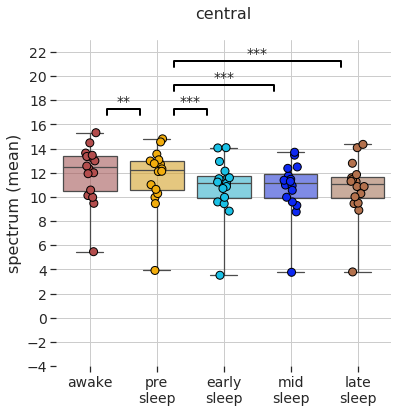

In [68]:
f, ax1 = plt.subplots(nrows = 1, ncols=1, figsize=(6, 6*1))


sns.boxplot(x="state",y="spectrum",hue='state',data=plotspectrum_df2[plotspectrum_df2.channel == 'central'],
            whis=np.inf, ax=ax1, showbox=True,dodge=False,
            meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            order=["awake","presleep","earlysleep","midsleep", "latesleep"],
            linewidth = 1.25, palette=color_dict)

sns.stripplot(x="state",y="spectrum",data=plotspectrum_df2[plotspectrum_df2.channel == 'central'],
              jitter=True, linewidth=1, ax=ax1,
              order=["awake","presleep","earlysleep","midsleep", "latesleep"],
              edgecolor ="black",palette=color_dict, s = 8)

ax1.legend_.remove()

b = list(ax1.get_children())

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))
    
ax1.set_ylabel('spectrum (mean)', fontsize=label_fontsize)
# ax1.set_xlabel('\nstate', fontsize=label_fontsize, weight = 'bold')
ax1.tick_params(axis='both', which='major', labelsize=label_fontsize-2)
ax1.grid(True)

ax1.set_ylim([-4, 23])
ax1.set_yticks([-4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])

string_val1 = '**'
statannotation(ax = ax1, x1 = 0.25, x2 = 0.75, y = 16.75, text = string_val1)

string_val2 = '***'
statannotation(ax = ax1, x1 = 1.25, x2 = 1.75, y = 16.75, text = string_val2)
statannotation(ax = ax1, x1 = 1.25, x2 = 2.75, y = 18.75, text = string_val2)
statannotation(ax = ax1, x1 = 1.25, x2 = 3.75, y = 20.75, text = string_val2)


ax1.set_xlabel('central\n', fontsize=label_fontsize)    
ax1.set_xticklabels(["awake","pre\nsleep","early\nsleep","mid\nsleep", "late\nsleep"])
ax1.xaxis.set_label_position('top') 
sns.despine(left=True, bottom = True)

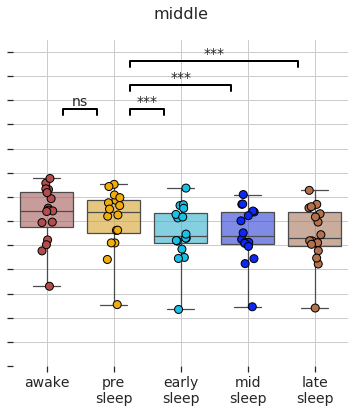

In [69]:
f, ax1 = plt.subplots(nrows = 1, ncols=1, figsize=(6, 6*1))


sns.boxplot(x="state",y="spectrum",hue='state',data=plotspectrum_df2[plotspectrum_df2.channel == 'middle'],
            whis=np.inf, ax=ax1, showbox=True,dodge=False,
            meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            order=["awake","presleep","earlysleep","midsleep", "latesleep"],
            linewidth = 1.25, palette=color_dict)

sns.stripplot(x="state",y="spectrum",data=plotspectrum_df2[plotspectrum_df2.channel == 'middle'],
              jitter=True, linewidth=1, ax=ax1,
              order=["awake","presleep","earlysleep","midsleep", "latesleep"],
              edgecolor ="black",palette=color_dict, s = 8)

ax1.legend_.remove()

b = list(ax1.get_children())

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))
    
ax1.set_ylabel('', fontsize=label_fontsize, weight = 'bold')
# ax1.set_xlabel('\nstate', fontsize=label_fontsize, weight = 'bold')
ax1.tick_params(axis='both', which='major', labelsize=label_fontsize-2)
ax1.grid(True)

ax1.set_ylim([-4, 23])
ax1.set_yticks([-4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
ax1.set_yticklabels([])

string_val1 = 'ns'
statannotation(ax = ax1, x1 = 0.25, x2 = 0.75, y = 16.75, text = string_val1)


string_val2 = '***'
statannotation(ax = ax1, x1 = 1.25, x2 = 1.75, y = 16.75, text = string_val2)
statannotation(ax = ax1, x1 = 1.25, x2 = 2.75, y = 18.75, text = string_val2)
statannotation(ax = ax1, x1 = 1.25, x2 = 3.75, y = 20.75, text = string_val2)


ax1.set_xticklabels(["awake","pre\nsleep","early\nsleep","mid\nsleep", "late\nsleep"])

ax1.set_xlabel('middle\n', fontsize=label_fontsize)    
ax1.xaxis.set_label_position('top') 
sns.despine(left=True, bottom = True)

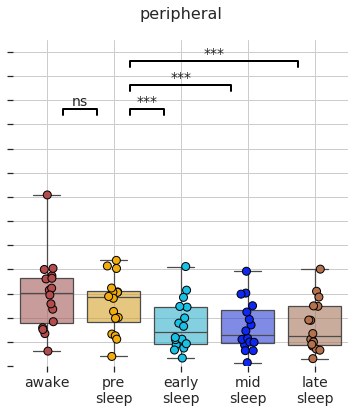

In [70]:
f, ax1 = plt.subplots(nrows = 1, ncols=1, figsize=(6, 6*1))


sns.boxplot(x="state",y="spectrum",hue='state',data=plotspectrum_df2[plotspectrum_df2.channel == 'peripheral'],
            whis=np.inf, ax=ax1, showbox=True,dodge=False,
            meanline=True,showmeans=False, showfliers=True,showcaps=True, 
            order=["awake","presleep","earlysleep","midsleep", "latesleep"],
            linewidth = 1.25, palette=color_dict)

sns.stripplot(x="state",y="spectrum",data=plotspectrum_df2[plotspectrum_df2.channel == 'peripheral'],
              jitter=True, linewidth=1, ax=ax1,
              order=["awake","presleep","earlysleep","midsleep", "latesleep"],
              edgecolor ="black",palette=color_dict, s = 8)

ax1.legend_.remove()

b = list(ax1.get_children())

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .6))
    
ax1.set_ylabel('', fontsize=label_fontsize, weight = 'bold')
# ax1.set_xlabel('\nstate', fontsize=label_fontsize, weight = 'bold')
ax1.tick_params(axis='both', which='major', labelsize=label_fontsize-2)
ax1.grid(True)

ax1.set_ylim([-4, 23])
ax1.set_yticks([-4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
ax1.set_yticklabels([])

string_val1 = 'ns'
statannotation(ax = ax1, x1 = 0.25, x2 = 0.75, y = 16.75, text = string_val1)


string_val2 = '***'
statannotation(ax = ax1, x1 = 1.25, x2 = 1.75, y = 16.75, text = string_val2)
statannotation(ax = ax1, x1 = 1.25, x2 = 2.75, y = 18.75, text = string_val2)
statannotation(ax = ax1, x1 = 1.25, x2 = 3.75, y = 20.75, text = string_val2)


ax1.set_xticklabels(["awake","pre\nsleep","early\nsleep","mid\nsleep", "late\nsleep"])

ax1.set_xlabel('peripheral\n', fontsize=label_fontsize)    
ax1.xaxis.set_label_position('top') 
sns.despine(left=True, bottom = True)